# Gender Recognition by Voice | 02 | Data Preparation

## Preparation Overview
The goal of data preparation is to clean and shape the data in ways that make it satisfactory for the machine learning process. Fortunately, our dataset is not lacking any data points and therefore does not need cleaning. However, as described further in this notebook, our data is unscaled and must be preprocessed before we can use it to shape our prediction models.

## Import Libraries

In [1]:
import obj
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters
pd.set_option('display.max_columns', 30)  # set pandas to display all columns
sns.set_style('whitegrid')  # set plot backgrounds to white

# Set graphics to appear inline with notebook code
%matplotlib inline

Import raw data DataFrame object from previous notebook.

In [2]:
data_raw = obj.load('var/data_raw')

## Scale data
Before passing data through a machine learning algorithm, it is important to scale each parameter relative to the others such that each parameter affects equal pull on the training process. If left unscaled, data with numerically larger (absolute) values will impose a much greater affect on the learning processes, skewing the prediction model to favor their patterns, whether or not they are useful for prediction. Likewise, numerically smaller data points will not affect much pull on the learning processes, even if they are strong predictors and highly worthwhile.

### Notice current range of parameters

In [3]:
data_raw.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


### Scale data using Scikit-learn scaler

In [4]:
# Import scaler module
from sklearn.preprocessing import StandardScaler

# Separate data from labels
feat_raw = data_raw.drop('label',axis=1)
label    = data_raw['label']

# Instantiate scaler
scaler = StandardScaler()

# Shape scaler to data
scaler.fit(feat_raw)

# Scale features using scaler
feat_scale = scaler.transform(feat_raw)

# Create DataFrame
feat_scale = pd.DataFrame(feat_scale, columns=feat_raw.columns)
feat_scale.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,-4.049248,0.427355,-4.224901,-2.576102,-5.693607,-0.214778,2.293306,1.762946,-0.039083,0.471575,-2.141210,-4.049248,-1.812038,-1.097998,0.565959,-1.564205,-0.708404,-1.431422,-1.419137,-1.454772
1,-3.841053,0.611669,-3.999293,-2.486885,-5.588987,-0.258485,4.548056,4.433008,-0.065236,0.594431,-2.141210,-3.841053,-1.079594,-1.091533,-0.294030,-1.561916,-0.708404,-1.418107,-1.405818,-1.014103
2,-3.463066,1.603848,-4.095851,-2.706986,-3.928699,0.909326,6.513656,7.326207,-1.083730,0.398261,-2.141210,-3.463066,-1.365368,-1.100397,0.410480,-1.563866,-0.708404,-1.429203,-1.416917,-1.065344
3,-0.992157,0.899998,-0.759454,-0.901418,-0.711205,0.632690,-0.449858,-0.240099,1.516383,1.797340,-1.054576,-0.992157,-1.666966,-0.988934,-0.294030,-1.195367,-0.708404,-1.273867,-1.261532,0.614286
4,-1.530640,1.322561,-1.676948,-1.268395,-0.792029,1.005588,-0.480911,-0.238940,1.708336,2.114740,-0.790514,-1.530640,-1.127233,-1.034015,0.260185,-0.221660,-0.708404,0.124154,0.136933,0.289046


In [5]:
# Merge scaled data back with labels
data_scale = pd.concat([feat_scale,label], axis=1)

## Remove Correlated Data
It will be interesting to test the effect of removing parameters that exhibit high correlations to other parameters. We will create a modified DataFrame that removes some parameters but leaves their matching, highly-correlated partner parameters.

In [6]:
data_scaleNoCorr = data_scale.drop(['kurt','centroid','dfrange','IQR'], axis=1)
data_scaleNoCorr.head()

,meanfreq,sd,median,Q25,Q75,skew,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,mindom,maxdom,modindx,label
0,-4.049248,0.427355,-4.224901,-2.576102,-5.693607,2.293306,-0.039083,0.471575,-2.141210,-1.812038,-1.097998,0.565959,-1.564205,-0.708404,-1.431422,-1.454772,male
1,-3.841053,0.611669,-3.999293,-2.486885,-5.588987,4.548056,-0.065236,0.594431,-2.141210,-1.079594,-1.091533,-0.294030,-1.561916,-0.708404,-1.418107,-1.014103,male
2,-3.463066,1.603848,-4.095851,-2.706986,-3.928699,6.513656,-1.083730,0.398261,-2.141210,-1.365368,-1.100397,0.410480,-1.563866,-0.708404,-1.429203,-1.065344,male
3,-0.992157,0.899998,-0.759454,-0.901418,-0.711205,-0.449858,1.516383,1.797340,-1.054576,-1.666966,-0.988934,-0.294030,-1.195367,-0.708404,-1.273867,0.614286,male
4,-1.530640,1.322561,-1.676948,-1.268395,-0.792029,-0.480911,1.708336,2.114740,-0.790514,-1.127233,-1.034015,0.260185,-0.221660,-0.708404,0.124154,0.289046,male


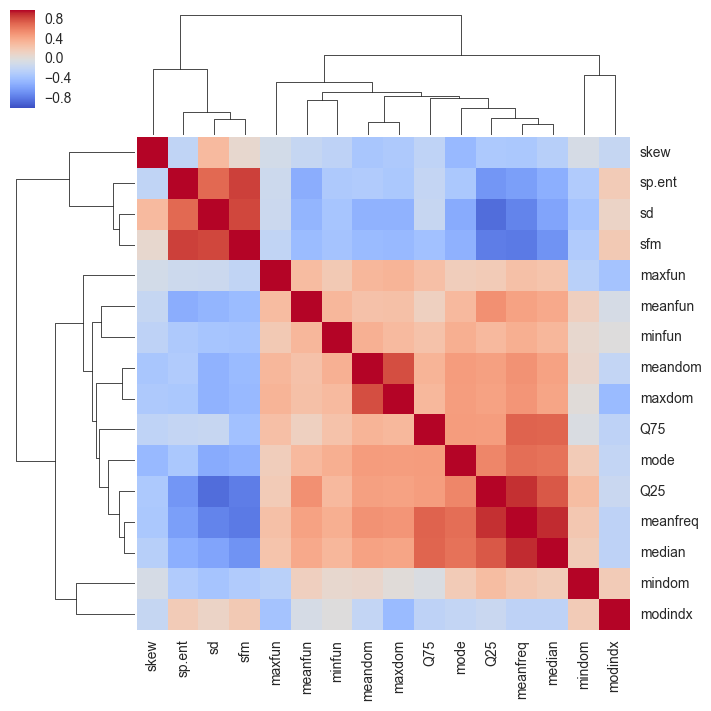

In [7]:
sns.set_style('whitegrid')
g = sns.clustermap(data_scaleNoCorr.corr(), cmap='coolwarm', figsize=(8,8))
for text in g.ax_heatmap.get_yticklabels():
    text.set_rotation('horizontal')

## Output data

In [8]:
obj.save(data_scale,       'var/data_scale')
obj.save(data_scaleNoCorr, 'var/data_scaleNoCorr')